## Import library

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

## Load Data

In [45]:
df = pd.read_csv("./CSV_Files/PlayTennis.csv")
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


## Null Values

In [46]:
df.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [47]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,high,False,yes
freq,5,6,7,8,9


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


## Unique Values

In [49]:
df['outlook'].unique()

array(['sunny', 'overcast', 'rainy'], dtype=object)

In [50]:
df['temp'].unique()

array(['hot', 'mild', 'cool'], dtype=object)

In [51]:
df['humidity'].unique()

array(['high', 'normal'], dtype=object)

In [52]:
df['windy'].unique()

array([False,  True])

In [53]:
df['play'].unique()

array(['no', 'yes'], dtype=object)

## Label Encoder

In [54]:
cle = LabelEncoder()

df['outlook'] = cle.fit_transform(df['outlook'])
df['temp'] = cle.fit_transform(df['temp'])
df['humidity'] = cle.fit_transform(df['humidity'])
df['windy'] = cle.fit_transform(df['windy'])
df['play'] = cle.fit_transform(df['play'])

In [55]:
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [68]:
df.describe()

,outlook,temp,humidity,windy,play
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.071429,1.142857,0.500000,0.428571,0.642857
std,0.828742,0.864438,0.518875,0.513553,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,0.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000


## No need for split data because data is too small

In [56]:
y = df['play']
X = df.drop(['play'],axis=1)

## DecisionTreeClassifier

In [57]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'entropy = 0

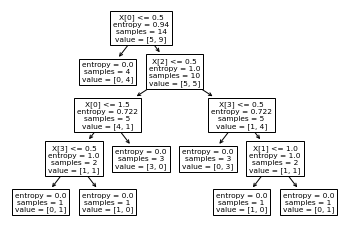

In [58]:
tree.plot_tree(clf)

In [59]:
X_pred = clf.predict(X)

In [60]:
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

### Rendom Data

In [61]:
result = clf.predict([[0, 1, 0, 1]])
result

array([1])

## DecisionTreeRegressor

In [62]:
reg = tree.DecisionTreeRegressor(criterion = 'entropy')
reg = clf.fit(X, y)

[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 65.232, 'X[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'entropy = 0

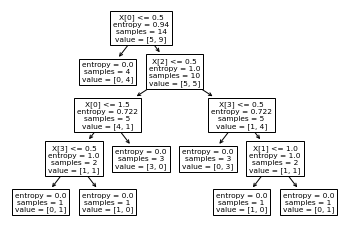

In [63]:
tree.plot_tree(reg)

In [64]:
X_pred_reg = reg.predict(X)

In [65]:
X_pred_reg == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

### Rendom Data

In [66]:
result = reg.predict([[0, 1, 0, 1]])
result

array([1])